
# Handling Missing Values

**Author:** IT24104241 – Bandaranayaka V.P.D.

This notebook identifies and imputes missing values.  Numeric features are imputed with the median, while categorical features are imputed with the most frequent value.


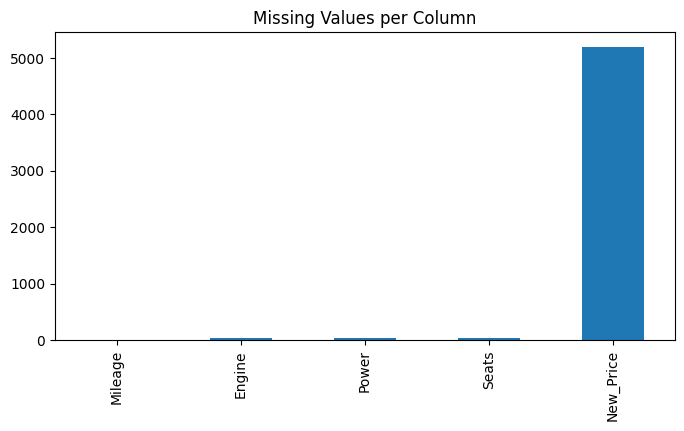

Remaining missing values (train): 0
Remaining missing values (test): 0


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np  

# Load CSVs
train_df = pd.read_csv('train-data.csv', index_col=False)
test_df = pd.read_csv('test-data.csv', index_col=False)

# Drop unwanted index column if present
for df in [train_df, test_df]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop duplicates in training
train_df = train_df.drop_duplicates()

# Identify numeric and categorical columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

# Visualize missing counts in train
missing_counts = train_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
if not missing_counts.empty:
    missing_counts.plot(kind='bar', figsize=(8, 4))
    plt.title('Missing Values per Column')
    plt.show()

# Imputation
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

train_df[numeric_cols] = num_imputer.fit_transform(train_df[numeric_cols])
train_df[categorical_cols] = cat_imputer.fit_transform(train_df[categorical_cols])

# --- Handle test set safely ---
for col in numeric_cols:
    if col not in test_df.columns:
        test_df[col] = np.nan   # FIX: use np.nan
for col in categorical_cols:
    if col not in test_df.columns:
        test_df[col] = np.nan   # also safe for categories

# Impute test data
test_df[numeric_cols] = num_imputer.transform(test_df[numeric_cols])
test_df[categorical_cols] = cat_imputer.transform(test_df[categorical_cols])

# Check results
print('Remaining missing values (train):', train_df.isnull().sum().sum())
print('Remaining missing values (test):', test_df.isnull().sum().sum())
